In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [2]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1602,tt0366551,9000000,23936908,Harold & Kumar Go to White Castle,John Cho|Kal Penn|Paula GarcÃ©s|Neil Patrick H...,Danny Leiner,Fast Food. High Times.,"Sometimes, it takes a strange night to put eve...",88,Comedy|Adventure,New Line Cinema,5/30/2004,6.4,2004
804,tt1240982,49900000,26121638,Your Highness,Danny McBride|James Franco|Natalie Portman|Zoo...,David Gordon Green,Get your quest on.,"A fantasy movie about an arrogant, lazy prince...",102,Adventure|Fantasy|Action|Comedy,Universal Pictures|Stuber Productions,4/8/2011,5.1,2011
1005,tt1656190,30000000,40346186,Safe,Jason Statham|Chris Sarandon|James Hong|Cather...,Boaz Yakin,She has the code. He is the key.,After a former elite agent rescues a 12-year-o...,94,Action|Crime|Thriller,Lawrence Bender Productions|IM Global|Automati...,4/16/2012,6.2,2012
1633,tt0375063,16000000,109502303,Sideways,Paul Giamatti|Thomas Haden Church|Virginia Mad...,Alexander Payne,In search of wine. In search of women. In sear...,Two middle-aged men embark on a spiritual jour...,126,Comedy|Drama|Romance,Fox Searchlight Pictures|Michael London Produc...,10/22/2004,6.6,2004
1608,tt0330793,33000000,54700105,The Punisher,Thomas Jane|John Travolta|Will Patton|Roy Sche...,Jonathan Hensleigh,"There is no justice, there is only revenge.",When undercover FBI agent Frank Castle's wife ...,124,Action|Crime|Drama,Lions Gate Films|VIP 3 Medienfonds|Valhalla Mo...,4/15/2004,6.0,2004


In [3]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [4]:
answers = {} # создадим словарь для ответов

data['profit'] = data['revenue'] - data['budget']
# создаем колонку profit как разница между кассовыми сборами и бюджетом фильма

def split_explode(df, column, sep='|'):
    '''Создаем функцию split_explode для разделения строковых значений, где df - датафрейм, к которому 
    применяем функцию, column - колонка со списком строковых значений со значением разделителя sep='|'
    по умолчанию'''
    df[column] = df[column].str.split(sep)  # разбиваем строку по разделителю на список значений  
    return df.explode(column) # "взрываем" получившийся список на весь датафрейм

def month_(x):
    '''Данная функция по номеру месяца задает время года: зима, весна, лето или осень'''
    x = int(x)
    if 3<=x<=5:
        return 'весна'
    elif 6<=x<=8:
        return 'лето'
    elif 9<=x<=11:
        return 'осень'
    else:
        return 'зима'

# 1. У какого фильма из списка самый большой бюджет?

Использовать варианты ответов в коде решения запрещено.    
Вы думаете и в жизни у вас будут варианты ответов?)

In [5]:
answers['1'] = '723    Pirates of the Caribbean: On Stranger Tides (tt1298650)'#+
answers

{'1': '723    Pirates of the Caribbean: On Stranger Tides (tt1298650)'}

In [6]:
data1 = data.copy()
'''Создадим для текущего задания новую копию исходного датафрейма data'''
data1[data1.budget == data1.budget.max()]
# Отфильтровали фильм с максимальным бюджетом

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,6.3,2011,641683000


ВАРИАНТ 2

<AxesSubplot:xlabel='budget', ylabel='original_title'>

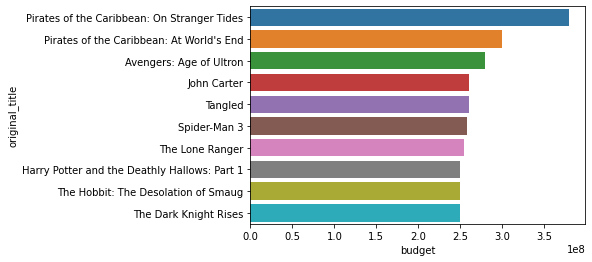

In [7]:
data1_2 = data.copy()
data1_2 = data1_2.sort_values(['budget'],ascending=False).head(10)
'''Отсортировали фильмы по параметру budget и вывели первые 10 значений'''
sns.barplot(y='original_title', x='budget', data=data1_2)
# вывели на графике 10 фильмов с наибольшим бюджетом

# 2. Какой из фильмов самый длительный (в минутах)?

In [8]:
answers['2'] = 'Gods and Generals  = +'

<AxesSubplot:xlabel='runtime', ylabel='original_title'>

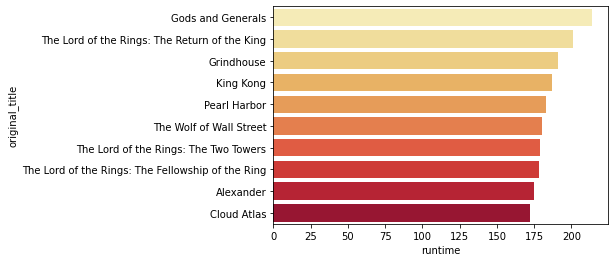

In [9]:
data2 = data.copy()
data2 = data2.sort_values(['runtime'],ascending=False).head(10)
'''Отсортируем фильмы по продолжительности и выведем 10 наиболее длительных на графике'''
sns.barplot(x='runtime', y='original_title', data=data2, palette="YlOrRd")

# 3. Какой из фильмов самый короткий (в минутах)?





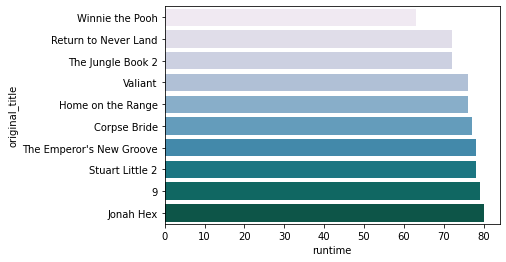

In [10]:
data3 = data.copy()
data3 = data3.sort_values(['runtime']).head(10)
'''Снова отсортируем фильмы по продолжительности и выведем 10 наиболее коротких'''
sns.barplot(x='runtime', y='original_title', data=data3, palette="PuBuGn")
answers['3'] = 'Winnie the Pooh (tt1449283) = +'

# 4. Какова средняя длительность фильмов?


In [11]:
data4 = data.copy()
data4 = round(data4.runtime.mean())
'''Выведем округленное значение средней продолжительности фильмов'''
answers['4'] = '110 = +'
data4

110

# 5. Каково медианное значение длительности фильмов? 

107.0

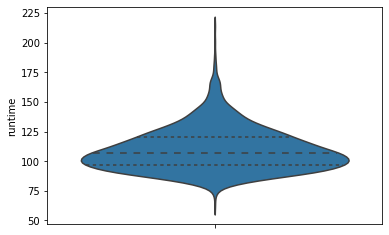

In [12]:
data5 = data.copy()
runtime5 = data5.runtime
# Выразим через переменную runtime5 значения длительности фильмов
display(data5.runtime.median())
# Выведем медианное значение длительности фильма
sns.violinplot(y=runtime5,inner='quartile')
# Построим график распределения фильмов по их длительности
answers['5'] = '107 = +'

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

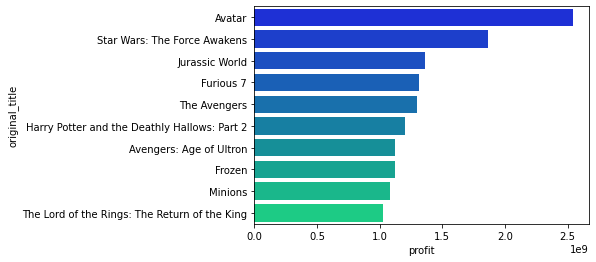

In [13]:
# лучше код получения столбца profit вынести в Предобработку что в начале
data6 = data.copy()
data6 = data6.sort_values(['profit'],ascending=False).head(10)
'''Отсортируем фильмы по прибыли и выведем 10 фильмов с наибольшей прибылью на графике'''
sns.barplot(x='profit', y='original_title', data=data6, palette="winter")
answers['6'] = 'Avatar (tt0499549) = +'

# 7. Какой фильм самый убыточный? 

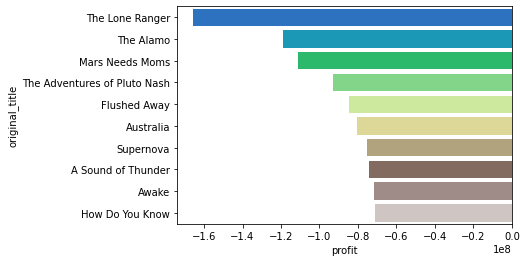

In [14]:
data7 = data.copy()
data7 = data7.sort_values(['profit']).head(10)
'''Отсортируем фильмы по прибыли и выведем 10 наиболее убыточных на графике'''
sns.barplot(x='profit', y='original_title', data=data7,palette="terrain")
answers['7'] = 'The Lone Ranger (tt1210819) = +'

# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [15]:
data8 = data.copy()
data8 = data8[data8.profit > 0].count()
answers['8'] = '1478'
'''Выведем посчитанное количество фильмов, чья прибыль больше 0, 
то есть объем их сборов выше заложенного бюджета'''
data8.original_title

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

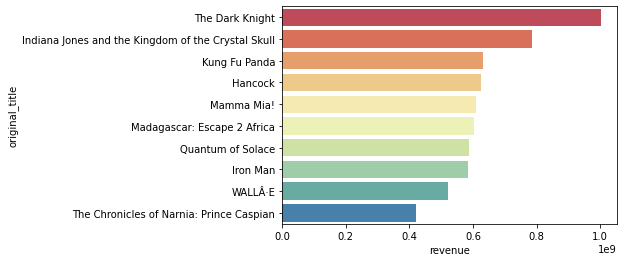

In [16]:
data9 = data.copy()
data9 = data9[data9.release_year == 2008] # отфильтовали фильмы 2008 года
data9 = data9.sort_values(['revenue'],ascending=False).head(10) 
# отсортировали фильмы по сборам и на графике вывели 10 с наибольшими сборами
sns.barplot(x='revenue', y='original_title', data=data9, palette="Spectral")
answers['9'] = 'The Dark Knight (tt0468569) = +'

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


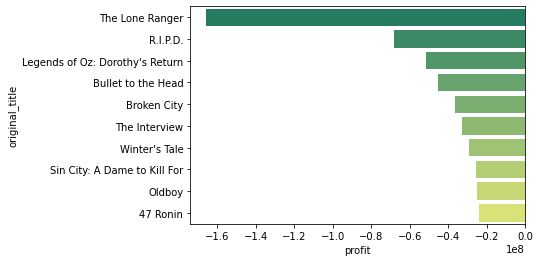

In [17]:
data10 = data.copy()
data10 = data10[(data10.release_year <= 2014)&(data10.release_year > 2012)]
data10 = data10.sort_values(['profit']).head(10)
sns.barplot(x='profit', y='original_title', data=data10, palette="summer")
answers['10'] = 'The Lone Ranger (tt1210819) = +'

# 11. Какого жанра фильмов больше всего?

In [18]:
data11 = data.copy()
data11 = split_explode(data11, 'genres')
'''воспользуемся функцией split_explode для разделения жанров, 
применение функции describe() показывает, что самый частый жанр - драма'''
data11.genres.describe(include=['object'])

count      5107
unique       19
top       Drama
freq        782
Name: genres, dtype: object

ВАРИАНТ 2

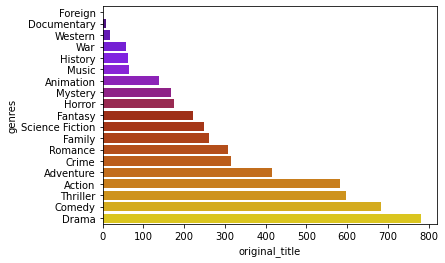

In [19]:
'''Найдем решение, используя группировку и графическую визуализацию'''
data11_2 = pd.DataFrame(data11.groupby(['genres'])['original_title'].count().sort_values().reset_index())
sns.barplot(x='original_title', y='genres',data=data11_2, palette="gnuplot")
answers['11'] = 'Drama = +'

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

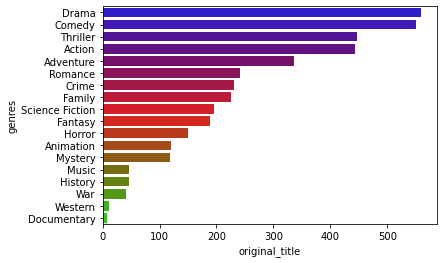

In [20]:
data12 = data.copy() 
data12 = data12[data12.profit > 0]
# отфильтровали фильмы, чьи сборы больше бюджета
data12 = split_explode(data12, 'genres')
# разделили жанры
data12 = pd.DataFrame(data12.groupby(['genres'])['original_title'].count().sort_values(ascending=False).reset_index())
'''Сгруппировали фильмы по жанрам, отсортировали и сохранили изменения в новом датафрейме'''
sns.barplot(x='original_title', y='genres',data=data12, palette="brg")
# Вывели график прибыльных фильмов по жанрам
answers['12'] = 'Drama = +'

# 13. У какого режиссера самые большие суммарные кассовые сборы?

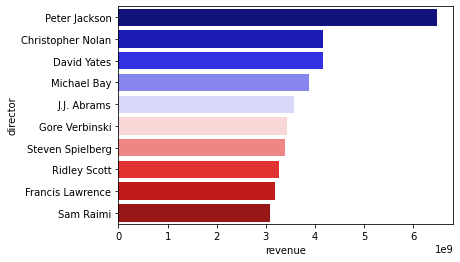

In [21]:
data13 = data.copy()
data13 = split_explode(data13, 'director')
'''Воспользуемся функцией split_explode для разбивки колонки с режиссерами,
далее сгруппируем, отсортируем по размерам сборов и выведем на графике
10 режиссеров с наибольшими сборами'''
data13 = pd.DataFrame(data13.groupby(['director']).sum().sort_values(['revenue'],ascending=False).head(10).reset_index())
sns.barplot(x='revenue', y='director',data=data13, palette="seismic")
answers['13'] = 'Peter Jackson = +'

# 14. Какой режисер снял больше всего фильмов в стиле Action?

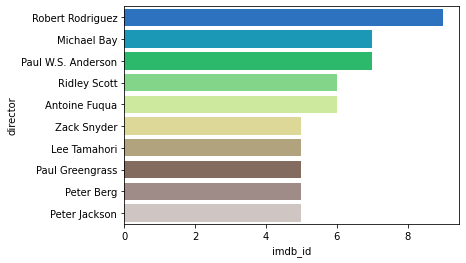

In [22]:
data14 = data.copy()
data14 = split_explode(data14, 'director')
# "разбили" и "взорвали" режиссеров
data14 = data14[data14.genres.str.contains('Action')]
# Отфильтровали фильмы, в которых встречается жанр 'Action'
data14 = pd.DataFrame(data14.groupby(['director'])['imdb_id'].count().sort_values(ascending=False).head(10).reset_index())
'''Сгруппировали фильмы по режиссерам, посчитали, отсортировали от наибольшего значения к
наименьшему и вывели на графике 10 режиссеров с наибольшим количеством фильмов в данном жанре'''
sns.barplot(x='imdb_id', y='director',data=data14, palette="terrain")
answers['14'] = 'Robert Rodriguez = +'

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

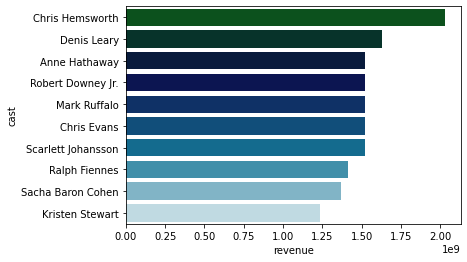

In [23]:
data15 = data.copy()
data15 = data15[data15.release_year == 2012]
# отфильтровали фильмы 2012 года
data15 = split_explode(data15, 'cast')
# разделили актеров
data15 = pd.DataFrame(data15.groupby(['cast'])['revenue'].sum().sort_values(ascending=False).head(10).reset_index())
'''сгруппировали фильмы по актерам и суммарным сборам каждого актера, отсортировали и вывели на графике
10 актеров с наибольшими кассовыми сборами'''
sns.barplot(x='revenue', y='cast',data=data15, palette="ocean")
answers['15'] = 'Chris Hemsworth = +'

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

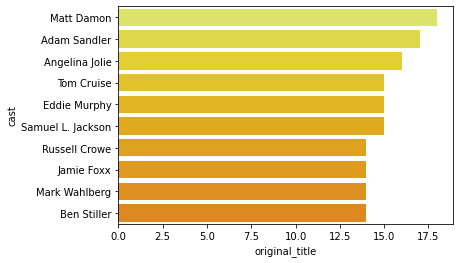

In [24]:
data16 = data.copy()
data16 = data16[data16.budget > data16.budget.mean()]
# отфильтровали фильмы с бюджетом больше среднего значения
data16 = split_explode(data16, 'cast')
# разделили актеров
data16 = pd.DataFrame(data16.groupby(['cast'])['original_title'].count().sort_values(ascending=False).head(10).reset_index())
# сгруппировали фильмы по актерам, отсортировали и вывели 10 самых эффективных ребят на графике
sns.barplot(x='original_title', y='cast',data=data16, palette="Wistia")
answers['16'] = 'Matt Damon = +'

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

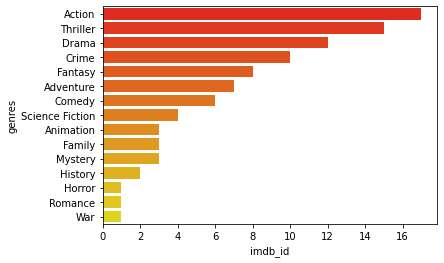

In [25]:
data17 = data.copy()
data17 = data17[data17.cast.str.contains('Nicolas Cage',na=False)]
# отсортировали фильмы, содержащие имя Nicolas Cage
data17 = split_explode(data17, 'genres')
data17 = pd.DataFrame(data17.groupby(['genres'])['imdb_id'].count().sort_values(ascending=False).reset_index())
sns.barplot(x='imdb_id', y='genres',data=data17, palette="autumn")
answers['17'] = 'Action = +'

# 18. Самый убыточный фильм от Paramount Pictures

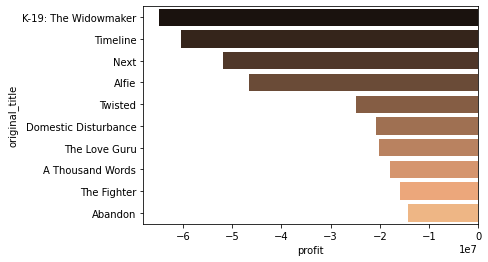

In [26]:
data18 = data.copy()
data18 = data18[data18.production_companies.str.contains('Paramount Pictures',na=False)]
data18 = pd.DataFrame(data18.groupby(['original_title'])['profit'].sum().sort_values().head(10).reset_index())
sns.barplot(x='profit', y='original_title',data=data18, palette="copper")
answers['18'] = 'K-19: The Widowmaker (tt0267626) = +'

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

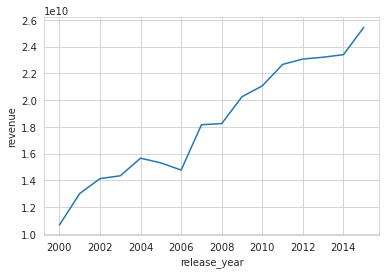

In [27]:
data19 = data.copy()
data19 = pd.DataFrame(data19.groupby(['release_year'])['revenue'].sum().reset_index())
'''Воспользуемся линейным графиком lineplot, где по оси x год выпуска фильма,
по оси y - суммарные кассовые сборы'''
sns.set_style("whitegrid")
sns.lineplot(y='revenue', x='release_year',data=data19)
answers['19'] = '2015 = +'

# 20. Какой самый прибыльный год для студии Warner Bros?

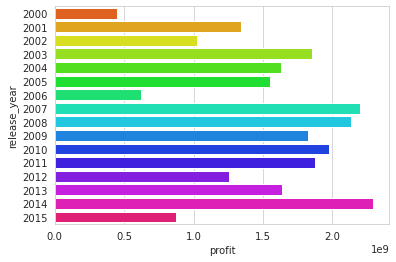

In [28]:
data20 = data.copy()
data20 = data20[data20.production_companies.str.contains('Warner Bros',na=False)]
data20 = pd.DataFrame(data20.groupby(['release_year'])['profit'].sum().reset_index())
sns.barplot(x='profit', y='release_year', data=data20, orient='h', palette="hsv")
answers['20'] = '2014 = +'

<AxesSubplot:xlabel='release_year', ylabel='profit'>

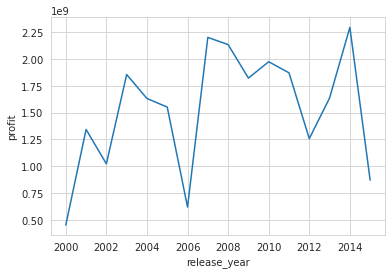

In [29]:
sns.lineplot(y='profit', x='release_year',data=data20)

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

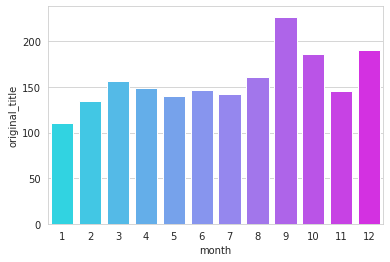

In [30]:
data21 = data.copy()
'''из даты выпуска выделим месяц в отдельную колонку, переименуем ее в 'month',
сгруппируем фильмы по месяцам, посчитаем и выведем на графике,
задав месяцам порядок с 1ого по 12й'''
data21.release_date = data21['release_date'].str.split('/', expand=True)
data21.rename(columns={"release_date": "month"}, inplace=True)
data21 = pd.DataFrame(data21.groupby(['month'])['original_title'].count().reset_index())
sns.barplot(y='original_title', x='month',data=data21, palette="cool", order=[str(x) for x in range(1,13)])
answers['21'] = 'Сентябрь = +'

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [31]:
data22 = data.copy()
data22.release_date = data22['release_date'].str.split('/', expand=True)
data22.rename(columns={"release_date": "month"}, inplace=True)
data22 = data22[data22['month'].isin(['6', '7', '8'])]
# отфильтровали новый датафрейм data22 с летними месяцами
data22 = data22.groupby(['month'])['original_title'].count().sum()
# в переменную data22 сохранили сумму всех фильмов за летние месяцы
answers['22'] = '450 = +'
data22

450

<AxesSubplot:xlabel='season', ylabel='original_title'>

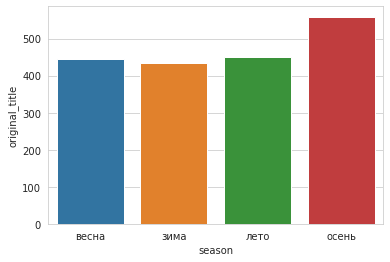

In [32]:
data22_2 = data.copy()
data22_2.release_date = data22_2['release_date'].str.split('/', expand=True)
data22_2.rename(columns={"release_date": "month"}, inplace=True)
data22_2['season'] = data22_2.month.apply(month_)
# создаем колонку season с временем года
data22_2_df = pd.DataFrame(data22_2.groupby(['season'])['original_title'].count().reset_index())
# сохранили датафрейм data22_2_df, где фильмы сгруппированы по времени года и посчитаны
sns.barplot(x='season', y='original_title', data = data22_2_df)
# на графике вывели сколько фильмов в сезоне

'не используя группировку вывели на график countplot количество фильмов по сезонам'

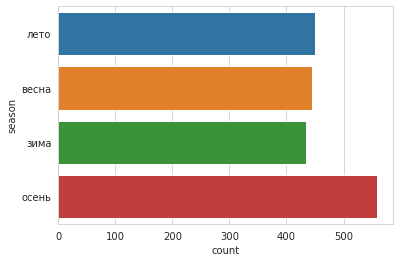

In [33]:
sns.countplot(y='season', data=data22_2)
'''не используя группировку вывели на график countplot количество фильмов по сезонам'''

# 23. Для какого режиссера зима – самое продуктивное время года? 

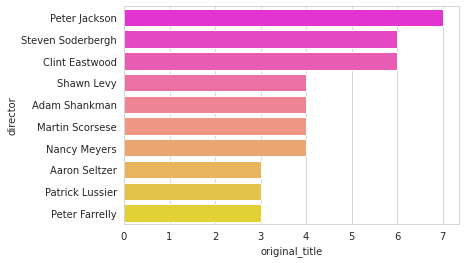

In [34]:
data23 = data.copy()
data23.release_date = data23['release_date'].str.split('/', expand=True)
data23.rename(columns={"release_date": "month"}, inplace=True)
data23 = data23[data23['month'].isin(['1', '2', '12'])]
# отфильтровали зимние месяцы
data23 = split_explode(data23, 'director')
data23 = pd.DataFrame(data23.groupby(['director'])['original_title'].count().sort_values(ascending=False).head(10).reset_index())
sns.barplot(y='director', x='original_title', data=data23, palette='spring')
# на графике 10 режиссеров, наиболее продуктивных зимой
answers['23'] = 'Peter Jackson = +'

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

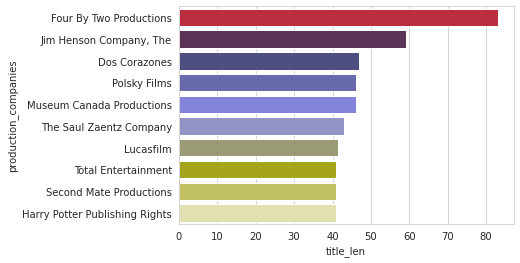

In [35]:
data24 = data.copy()
data24 = split_explode(data24, 'production_companies')
data24['title_len'] = data24['original_title'].str.len()
# в новой колонке title_len значения длины строки с названием фильма
data24 = pd.DataFrame(data24.groupby(['production_companies'])['title_len'].mean().sort_values(ascending=False).head(10).reset_index())
# датафрейм сгруппировали по студиям и отсортировали по средней длине фильмов от наибольшего
sns.barplot(x='title_len', y='production_companies', data=data24,  palette='gist_stern')
# на графике вывели 10 студий, дающих в среднем наиболее длинные названия своим фильмам
answers['24'] = 'Four By Two Productions = +'

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

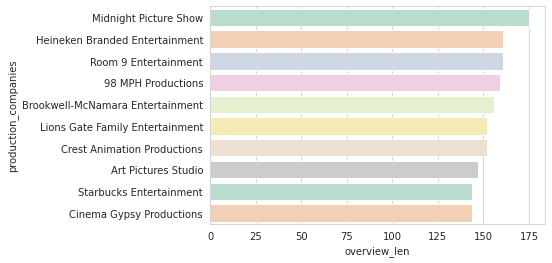

In [36]:
data25 = data.copy()
data25 = split_explode(data25, 'production_companies')
data25['overview_len'] = data25['overview'].apply(lambda x: len(str(x).split(' ')))
'''Новую колонку overview_len задали как количество слов в описании, посчтав их с 
помощью функции lambda x'''
data25 = pd.DataFrame(data25.groupby(['production_companies'])['overview_len'].mean().sort_values(ascending=False).head(10).reset_index())
sns.barplot(y='production_companies', x='overview_len', data=data25, palette='Pastel2')
answers['25'] = 'Midnight Picture Show = +'

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

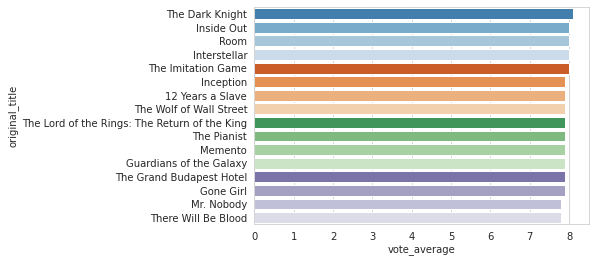

In [37]:
data26 = data.copy()
procent_99 = np.percentile(data26.vote_average, 99)
# Записываем в переменную оценку равную 99% от средней
data26 = data26[data26.vote_average >= procent_99].sort_values(by='vote_average', ascending=False).head(16)
# Выводим все фильмы с оценкой выше или равной 99%, сортируем и выводим лучшие 16 фильмов
sns.barplot(y='original_title', x='vote_average', data=data26, palette="tab20c")
# Выводим результат на графике
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave  = +'

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [38]:
'''для данного задания используем встроенную функцию combinations из itertools,
применим к колонке cast после разделения актеров и найдем сочетания,
затем с помощью функции mode() выведем самые частые комбинации'''
data27 = data.copy()
data27['cast'] = data27.cast.str.split('|')
data27.cast = data27.cast.apply(lambda x: list(combinations(sorted(x), 2))) 
data27 = data27.explode('cast').cast.mode()
answers['27'] = 'Daniel Radcliffe & Rupert Grint = +'
data27

0     (Daniel Radcliffe, Emma Watson)
1    (Daniel Radcliffe, Rupert Grint)
2         (Emma Watson, Rupert Grint)
dtype: object

ВАРИАНТ 2

# Submission

In [39]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{'1': '723    Pirates of the Caribbean: On Stranger Tides (tt1298650)',
 '2': 'Gods and Generals  = +',
 '3': 'Winnie the Pooh (tt1449283) = +',
 '4': '110 = +',
 '5': '107 = +',
 '6': 'Avatar (tt0499549) = +',
 '7': 'The Lone Ranger (tt1210819) = +',
 '8': '1478',
 '9': 'The Dark Knight (tt0468569) = +',
 '10': 'The Lone Ranger (tt1210819) = +',
 '11': 'Drama = +',
 '12': 'Drama = +',
 '13': 'Peter Jackson = +',
 '14': 'Robert Rodriguez = +',
 '15': 'Chris Hemsworth = +',
 '16': 'Matt Damon = +',
 '17': 'Action = +',
 '18': 'K-19: The Widowmaker (tt0267626) = +',
 '19': '2015 = +',
 '20': '2014 = +',
 '21': 'Сентябрь = +',
 '22': '450 = +',
 '23': 'Peter Jackson = +',
 '24': 'Four By Two Productions = +',
 '25': 'Midnight Picture Show = +',
 '26': 'Inside Out, The Dark Knight, 12 Years a Slave  = +',
 '27': 'Daniel Radcliffe & Rupert Grint = +'}

In [40]:
# и убедиться что ни чего не пропустил)
len(answers)

27